# School shootings

- **LONCOD**: Longitude code
- **LATCOD**: Latitude code
- **CDCODE**: Code for the Center for Disease Control and Prevention (CDC)
- **year**: Year of the incident
- **school**: Name of the school
- **city**: City where the incident occurred
- **state**: State where the incident occurred
- **address**: Address where the incident occurred
- **urbanrural**: Whether the incident occurred in an urban or rural area
- **race**: Race of the perpetrator or victims (if applicable)
- **killed**: Number of people killed in the incident
- **injured**: Number of people injured in the incident
- **victims**: Total number of victims in the incident (including those killed and injured)
- **date**: Date of the incident
- **type**: Type of incident (e.g., shooting, stabbing, etc.)
- **NCESSCH**: National Center for Education Statistics (NCES) School ID
- **time**: Time of the incident

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploración de la data

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.head()

LONCOD     LATCOD  CDCODE  year                            school  \
0 -75.584900  39.668100  1000.0  2009          William Penn High School   
1 -87.617500  41.839900  1701.0  2009  Dunbar Vocational Career Academy   
2 -90.165100  38.565700  1712.0  2009               Cahokia High School   
3 -78.311800  35.831500  3713.0  2009             Zebulon Middle School   
4 -83.113977  42.383593     NaN  2009               Central High School   

         city           state                          address  urbanrural  \
0  New Castle        Delaware                   713 E Basin Rd  suburbtown   
1     Chicago        Illinois                   3000 S King Dr       urban   
2     Cahokia        Illinois                     800 Range Ln  suburbtown   
3     Zebulon  North Carolina  Halifax Road and New Oak Street  suburbtown   
4     Detroit        Michigan                   2425 Tuxedo St       urban   

    race  killed  injured  victims       date           type       NCESSCH  \
0  BLACK       0        1        1   8-Jan-09    High School  1.000230e+11   
1  BLACK       0        5        5   9-Jan-09    High School  1.709930e+11   
2  BLACK       1        0        1  23-Jan-09    High School  1.708040e+11   
3  BLACK       0        1        1  11-Feb-09  Middle School  3.704720e+11   
4    NaN       0        1        1  17-Feb-09    High School  2.601103e+11   

     time  
0  8:30PM  
1  8:00PM  
2  7:20PM  
3  6:00AM  
4  2:20PM

In [4]:
df.shape

(180, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LONCOD      177 non-null    float64
 1   LATCOD      177 non-null    float64
 2   CDCODE      169 non-null    float64
 3   year        180 non-null    int64  
 4   school      180 non-null    object 
 5   city        180 non-null    object 
 6   state       180 non-null    object 
 7   address     180 non-null    object 
 8   urbanrural  177 non-null    object 
 9   race        173 non-null    object 
 10  killed      180 non-null    int64  
 11  injured     180 non-null    int64  
 12  victims     180 non-null    int64  
 13  date        180 non-null    object 
 14  type        180 non-null    object 
 15  NCESSCH     175 non-null    float64
 16  time        174 non-null    object 
dtypes: float64(4), int64(4), object(9)
memory usage: 24.0+ KB


In [6]:
df.describe()

LONCOD      LATCOD       CDCODE         year      killed  \
count  177.000000  177.000000   169.000000   180.000000  180.000000   
mean   -92.830582   36.812586  2588.940828  2014.694444    0.633333   
std     15.759432    5.364672  1593.753438     2.774781    2.456095   
min   -157.961977   21.400303   101.000000  2009.000000    0.000000   
25%    -96.858636   33.612911  1222.000000  2013.000000    0.000000   
50%    -87.636600   36.719900  2406.000000  2016.000000    0.000000   
75%    -81.937661   40.077165  3908.000000  2017.000000    1.000000   
max    -71.043600   61.213281  5504.000000  2018.000000   26.000000   

          injured     victims       NCESSCH  
count  180.000000  180.000000  1.750000e+02  
mean     1.344444    1.977778  2.525708e+11  
std      1.822645    3.617085  1.616620e+11  
min      0.000000    1.000000  2.595080e+05  
25%      1.000000    1.000000  1.200435e+11  
50%      1.000000    1.000000  2.400510e+11  
75%      2.000000    2.000000  3.904427e+11  
max     14.000000   31.000000  5.509600e+11

In [7]:
df.describe(include=object)

school     city       state  \
count                                180      180         180   
unique                               176      149          41   
top     Booker T. Washington High School  Houston  California   
freq                                   2        4          19   

                address urbanrural   race       date         type    time  
count               180        177    173        180          180     174  
unique              179          3      4        172            9      99  
top     222 W Casino Rd      urban  WHITE  30-Jun-16  High School  3:00PM  
freq                  2         80     73          2          118       9

## Limpieza y preparación de la data

Revisamos las columnas con datos vacíos para darle tratamiento.

In [8]:
df[df['LONCOD'].isnull()]

LONCOD  LATCOD  CDCODE  year                   school          city  \
80      NaN     NaN     NaN  2015  Duval County school bus  Jacksonville   
111     NaN     NaN     NaN  2016    Smalls Athletic Field          York   
137     NaN     NaN     NaN  2017              JFK Stadium   Springfield   

            state                              address urbanrural race  \
80        Florida  118th Street and Blanding Boulevard        NaN  NaN   
111  Pennsylvania                      31 Hamilton Ave        NaN  NaN   
137      Missouri                     1333 S Grant Ave        NaN  NaN   

     killed  injured  victims       date         type  NCESSCH    time  
80        0        2        2  14-May-15         K-12      NaN  4:20PM  
111       0        2        2   9-Sep-16  High School      NaN  9:30PM  
137       0        1        1  22-Jun-17  High School      NaN  6:45PM

Se completan los casilleros faltantes con información extraída a partir de Google maps.

In [9]:
df.loc[80,'LATCOD'] = 30.233892
df.loc[80,'LONCOD'] = -81.739378
df.loc[111,'LATCOD'] = 39.971016
df.loc[111,'LONCOD'] = -76.729525
df.loc[137,'LATCOD'] = 37.190827
df.loc[137,'LONCOD'] = -93.301877

Revisamos la columna referente a la zona en la que sucedieron los hechos.

In [10]:
df['urbanrural'].unique()

array(['suburbtown', 'urban', 'rural', nan], dtype=object)

Se vuelve a completar los casilleros faltantes con información extraída a partir de Google maps.

In [11]:
df.loc[[80,111,137],'urbanrural'] = 'suburbtown'

Revisamos la columna time y sus valores faltantes.

In [12]:
df[df['time'].isnull()]

LONCOD     LATCOD  CDCODE  year  \
30  -82.943715  42.445366  2614.0  2011   
43  -80.453001  25.536900  1226.0  2013   
44  -80.059801  26.708610  1222.0  2013   
48  -84.124600  33.773600  1304.0  2013   
74  -88.073954  30.669840   101.0  2015   
135 -95.974188  36.225223  4001.0  2017   

                                       school             city     state  \
30                      Chandler Park Academy     Harper Woods  Michigan   
43                      Redland Middle School        Homestead   Florida   
44   Alexander W. Dreyfoos School of the Arts  West Palm Beach   Florida   
48                     Stephenson High School   Stone Mountain   Georgia   
74                     Williamson High School           Mobile   Alabama   
135                        McLain High School            Tulsa  Oklahoma   

                     address  urbanrural   race  killed  injured  victims  \
30          20254 Kelly Road  suburbtown  BLACK       0        1        1   
43         16001 SW 248th St       rural   HISP       0        1        1   
44       501 S Sapodilla Ave       urban  WHITE       2        0        2   
48         701 Stephenson Rd  suburbtown  BLACK       0        1        1   
74   1567 East Dublin Street       urban  BLACK       0        1        1   
135        4929 N Peoria Ave       urban  BLACK       0        1        1   

          date           type       NCESSCH time  
30   26-Aug-11    High School  2.600168e+11  NaN  
43   24-May-13  Middle School  1.200390e+11  NaN  
44   20-Jun-13    High School  1.201500e+11  NaN  
48    3-Nov-13    High School  1.301740e+11  NaN  
74   16-Jan-15    High School  1.023700e+10  NaN  
135  26-May-17    High School  4.030240e+11  NaN

In [13]:
df['time'].unique()

array(['8:30PM', '8:00PM', '7:20PM', '6:00AM', '2:20PM', '10:00PM',
       '7:40PM', '8:02AM', '8:00AM', '1:50PM', '4:48PM', '8:20AM',
       '3:00PM', '1:45PM', '1:00PM', '7:30AM', '7:50AM', '12:00PM',
       '12:50PM', '10:40AM', '7:00AM', '6:30PM', '10:35AM', '6:30AM', nan,
       '4:45PM', '12:30PM', '1:30PM', '2:00PM', '10:45AM', '9:30AM',
       '9:00AM', '8:45PM', '10:30PM', '1:15PM', '12:33PM', '7:00PM',
       '8:11AM', '3:30PM', '10:51PM', '10:30AM', '11:15PM', '9:30PM',
       '4:30PM', '3:53PM', '8:15PM', '12:51PM', '7:40AM', '4:00PM',
       '2:45PM', '7:30PM', '9:35PM', '10:15PM', '6:55PM', '10:00AM',
       '4:20PM', '9:55PM', '12:45PM', '8:10PM', '12:44PM', '11:15AM',
       '2:25PM', '5:00PM', '8:30AM', '10:50PM', '7:35PM', '12:00AM',
       '9:33PM', '1:45AM', '9:15PM', '9:20PM', '2:30PM', '9:45PM',
       '3:45PM', '2:40PM', '11:27PM', '3:17PM', '12:35PM', '9:00PM',
       '7:15PM', '7:35AM', '6:20PM', '11:01AM', '10:27AM', '9:05AM',
       '6:45PM', '11:30AM', '8:04

Creamos una función para extraer el número de horas de la columna time. 

**Observación:** En la data están registradas horarios nocturnos. No se tiene seguridad si es posible que estos hechos se hayan suscitado en horarios tan altos de la noche, así que por conveniencia y facilitar la visualización de los gráficos se ha decido asumir que todos pertenecen al horario matutino. Los vacíos serán llenados con el valor de 0.

In [14]:
def extract_hour(x):
    if x != 'nan':
        sep = x.split(':')
        hour = sep[0]
        result = int(hour)
    else:
        result = 0
    return(result)

In [15]:
df['hour'] = df.time.astype(str).apply(extract_hour)

Revisamos la columna sobre etnicidad del perpetrador.

In [16]:
df['race'].unique()

array(['BLACK', nan, 'WHITE', 'HISP', 'ASIAN'], dtype=object)

In [17]:
df[df['race'].isnull()]

LONCOD     LATCOD  CDCODE  year                   school  \
4   -83.113977  42.383593     NaN  2009      Central High School   
57  -94.568800  39.094000  2905.0  2014  Raytown Success Academy   
80  -81.739378  30.233892     NaN  2015  Duval County school bus   
111 -76.729525  39.971016     NaN  2016    Smalls Athletic Field   
121 -95.549249  29.674479  4809.0  2016      Houston Can Academy   
137 -93.301877  37.190827     NaN  2017              JFK Stadium   
150 -83.715607  43.098421  2605.0  2017      Beecher High School   

             city         state                              address  \
4         Detroit      Michigan                       2425 Tuxedo St   
57        Raytown      Missouri                     10750 E Missouri   
80   Jacksonville       Florida  118th Street and Blanding Boulevard   
111          York  Pennsylvania                      31 Hamilton Ave   
121       Houston         Texas                9745 Bissonnet Street   
137   Springfield      Missouri                     1333 S Grant Ave   
150  Mount Morris      Michigan                         6255 Neff Rd   

     urbanrural race  killed  injured  victims       date         type  \
4         urban  NaN       0        1        1  17-Feb-09  High School   
57        urban  NaN       1        0        1  20-Feb-14         K-12   
80   suburbtown  NaN       0        2        2  14-May-15         K-12   
111  suburbtown  NaN       0        2        2   9-Sep-16  High School   
121       urban  NaN       1        1        2   7-Nov-16  High School   
137  suburbtown  NaN       0        1        1  22-Jun-17  High School   
150  suburbtown  NaN       0        1        1  19-Dec-17  High School   

          NCESSCH     time  hour  
4    2.601103e+11   2:20PM     2  
57   2.916400e+11  10:30AM    10  
80            NaN   4:20PM     4  
111           NaN   9:30PM     9  
121  4.800016e+11  12:35PM    12  
137           NaN   6:45PM     6  
150  2.604500e+11   9:15PM     9

Obtener esta información es relativamente más complicadao por lo que se opta por llenar los vacíos con una nueva categoria 'NOT SPEC' (no especificado).

In [18]:
df = df.fillna('NOT SPEC')

Convertimos la columna 'date' a datetime y usamos sus elementos para crear 3 columnas más.

In [19]:
df.date = pd.to_datetime(df.date)
df['year'] = df.date.apply(lambda x : x.year)
df['month'] = df.date.apply(lambda x : x.month)
df['day'] = df.date.apply(lambda x : x.day)

Revisamos el estado final del DataFrame.

In [20]:
df

LONCOD     LATCOD    CDCODE  year                            school  \
0    -75.584900  39.668100    1000.0  2009          William Penn High School   
1    -87.617500  41.839900    1701.0  2009  Dunbar Vocational Career Academy   
2    -90.165100  38.565700    1712.0  2009               Cahokia High School   
3    -78.311800  35.831500    3713.0  2009             Zebulon Middle School   
4    -83.113977  42.383593  NOT SPEC  2009               Central High School   
..          ...        ...       ...   ...                               ...   
175 -149.881113  61.213281     200.0  2018          Denali Elementary School   
176  -77.378427  37.471892    5104.0  2018                Varina High School   
177  -80.691593  35.120282    3709.0  2018                Butler High School   
178  -76.382449  36.826811    5103.0  2018      Simonsdale Elementary School   
179  -83.229837  36.784261    2105.0  2018          Cawood Elementary School   

           city           state                          address  urbanrural  \
0    New Castle        Delaware                   713 E Basin Rd  suburbtown   
1       Chicago        Illinois                   3000 S King Dr       urban   
2       Cahokia        Illinois                     800 Range Ln  suburbtown   
3       Zebulon  North Carolina  Halifax Road and New Oak Street  suburbtown   
4       Detroit        Michigan                   2425 Tuxedo St       urban   
..          ...             ...                              ...         ...   
175   Anchorage          Alaska                   952 Cordova St       urban   
176     Henrico        Virginia                   7053 Messer Rd       rural   
177    Matthews  North Carolina       1810 Matthews Mint Hill Rd  suburbtown   
178  Portsmouth        Virginia                 4841 Clifford St       urban   
179      Cawood        Kentucky                       51 Nola St       rural   

         race  killed  injured  victims       date               type  \
0       BLACK       0        1        1 2009-01-08        High School   
1       BLACK       0        5        5 2009-01-09        High School   
2       BLACK       1        0        1 2009-01-23        High School   
3       BLACK       0        1        1 2009-02-11      Middle School   
4    NOT SPEC       0        1        1 2009-02-17        High School   
..        ...     ...      ...      ...        ...                ...   
175     WHITE       0        1        1 2018-10-03  Elementary School   
176     BLACK       0        1        1 2018-10-07        High School   
177     WHITE       1        0        1 2018-10-29        High School   
178     WHITE       0        1        1 2018-11-20  Elementary School   
179     WHITE       0        2        2 2018-12-11  Elementary School   

            NCESSCH    time  hour  month  day  
0    100023000209.0  8:30PM     8      1    8  
1    170993000588.0  8:00PM     8      1    9  
2    170804000409.0  7:20PM     7      1   23  
3    370472001913.0  6:00AM     6      2   11  
4    260110304670.0  2:20PM     2      2   17  
..              ...     ...   ...    ...  ...  
175   20018000072.0  9:30AM     9     10    3  
176  510189000835.0  9:30PM     9     10    7  
177  370297002324.0  7:15AM     7     10   29  
178  510300001257.0  4:00PM     4     11   20  
179  210254000534.0  9:00PM     9     12   11  

[180 rows x 20 columns]

Retiramos un par de columnas más pues no serán usadas más adelante.

In [21]:
df = df.drop(['time','date'], axis=1)

Se realiza una última revisión de los datos.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   LONCOD      180 non-null    float64
 1   LATCOD      180 non-null    float64
 2   CDCODE      180 non-null    object 
 3   year        180 non-null    int64  
 4   school      180 non-null    object 
 5   city        180 non-null    object 
 6   state       180 non-null    object 
 7   address     180 non-null    object 
 8   urbanrural  180 non-null    object 
 9   race        180 non-null    object 
 10  killed      180 non-null    int64  
 11  injured     180 non-null    int64  
 12  victims     180 non-null    int64  
 13  type        180 non-null    object 
 14  NCESSCH     180 non-null    object 
 15  hour        180 non-null    int64  
 16  month       180 non-null    int64  
 17  day         180 non-null    int64  
dtypes: float64(2), int64(7), object(9)
memory usage: 25.4+ KB


Parece ser que ya tenemos la data preparada para pasar al proceso de visualización.

## Visualización de data

In [23]:
sns.set_theme()

#### Cantidad de tiroteos y víctimas por año

**Observación:** recordar que en el dataset el número de víctimas resulta de la suma de muertos y heridos.

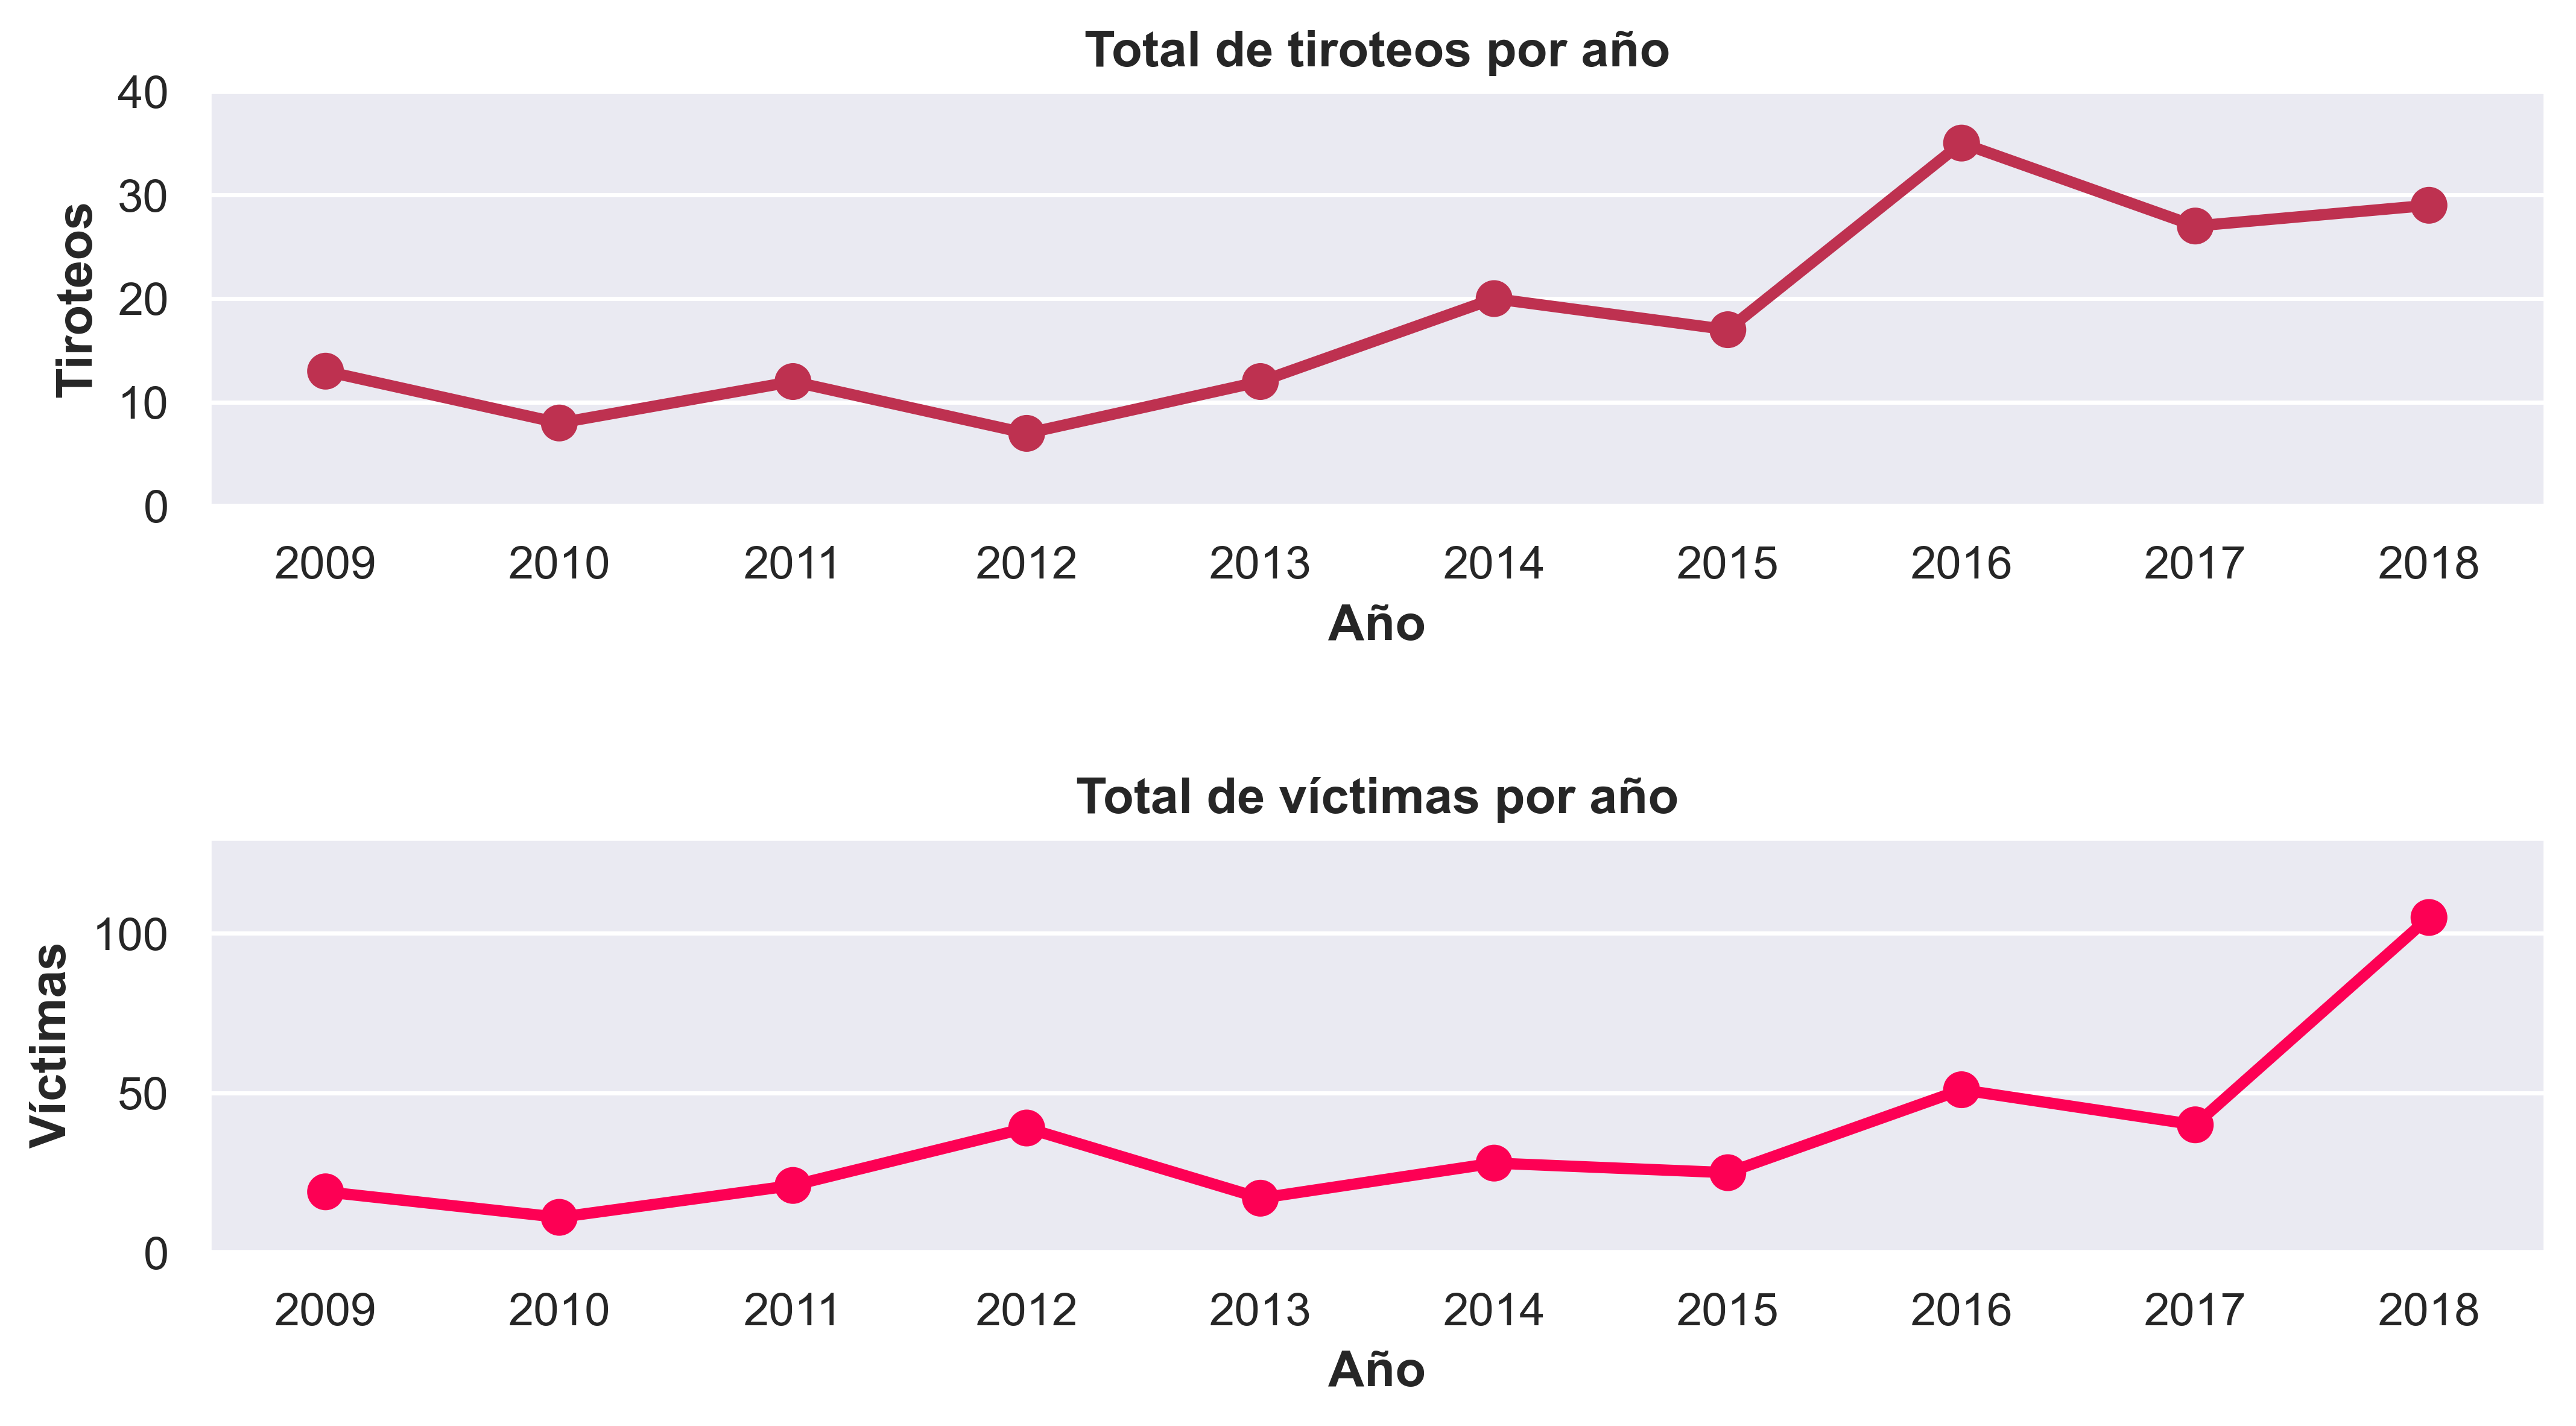

In [24]:
years = df.groupby(by='year').sum(numeric_only=True).reset_index()
shoot = df['year'].value_counts()
shoot = shoot.reset_index(name='count')

fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(10,5), dpi=500)
sns.pointplot(data=shoot, x='index', y='count', color='#be3150',ax=axes[0])
axes[0].set_title('Total de tiroteos por año', weight='bold')
axes[0].set_xlabel('Año', weight='bold')
axes[0].set_ylabel('Tiroteos', weight='bold')
axes[0].set_ylim(0,40)

sns.pointplot(data=years, x='year', y='victims', color='#fd0054',ax=axes[1])
axes[1].set_title('Total de víctimas por año', weight='bold')
axes[1].set_xlabel('Año', weight='bold')
axes[1].set_ylabel('Víctimas', weight='bold')
axes[1].set_ylim(0,130)

plt.subplots_adjust(hspace=0.8)

Se puede observar que a lo largo de los años, la cantidad de tiroteos ha ido en aumento lo que implica, también, un aumento en el número de víctimas. Si bien desde el 2009 se observa un ligero incremento, es a partir del 2014 en el que el aumento de casos se más marcado.

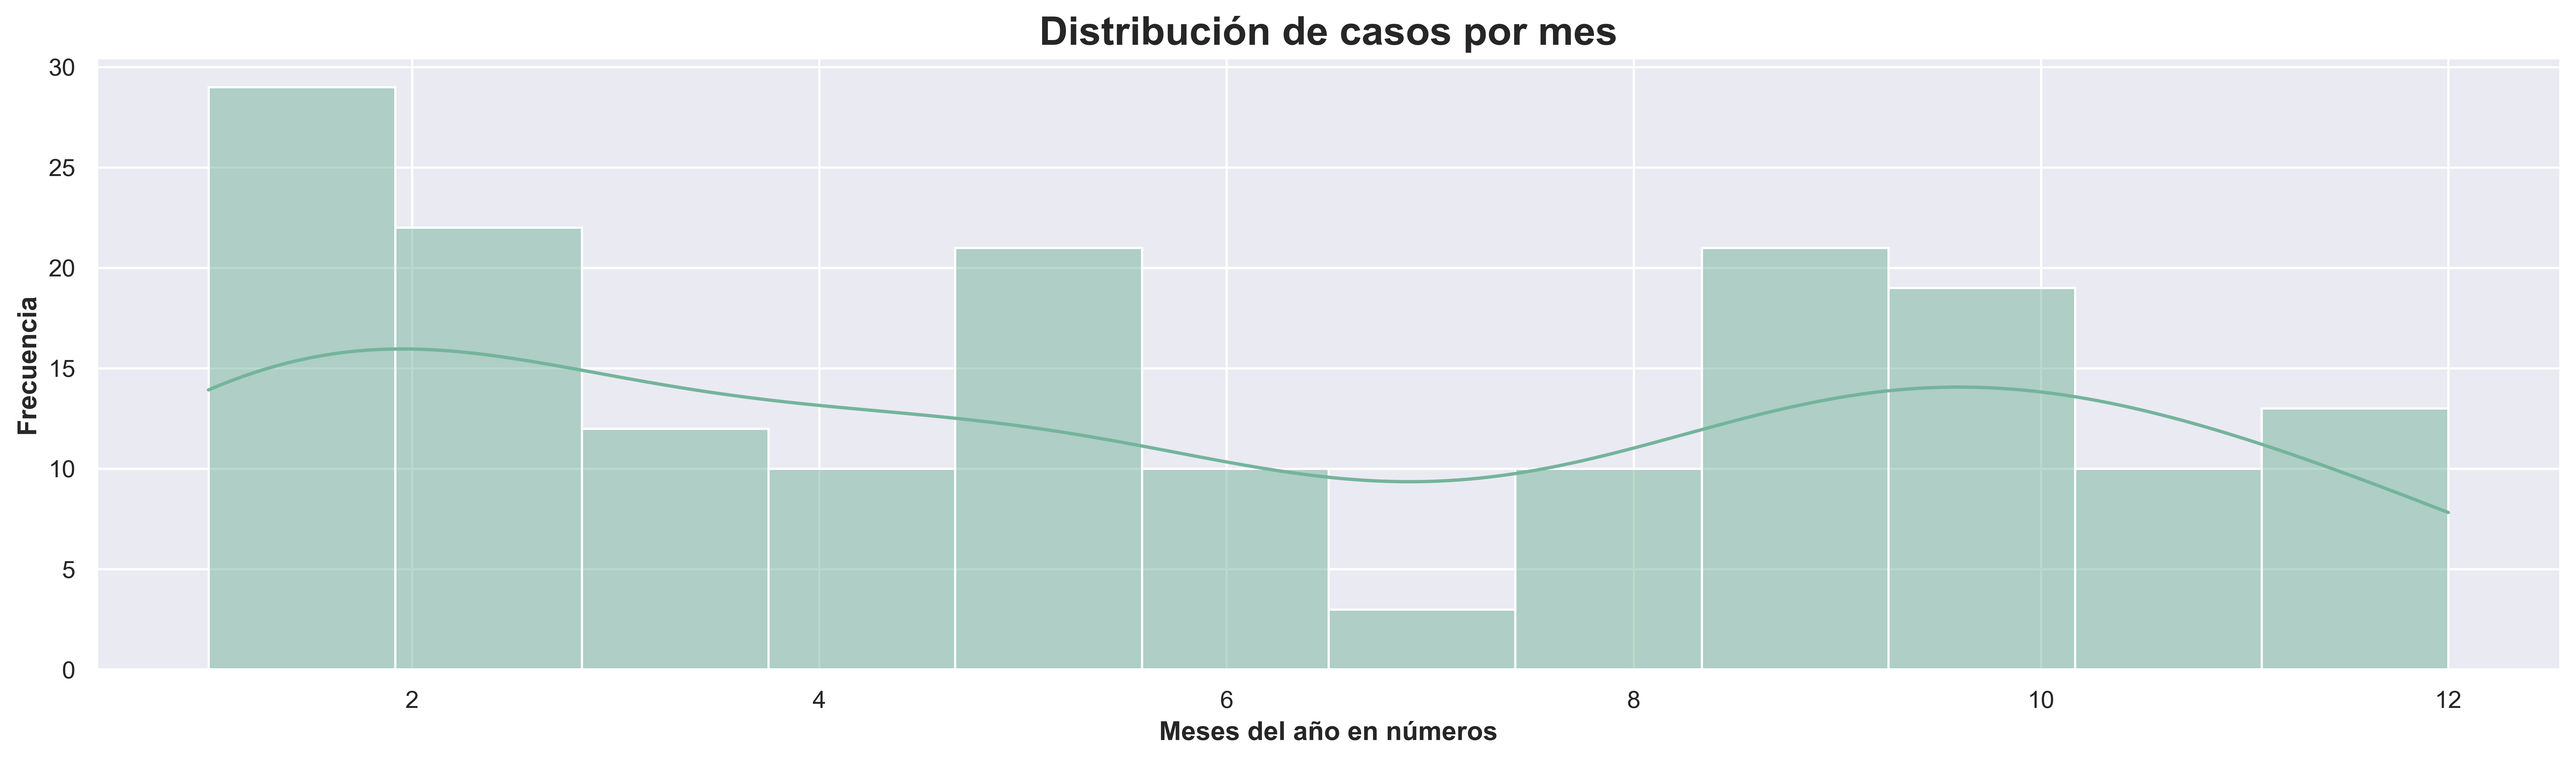

In [25]:
plt.figure(figsize=(20,5), dpi=500)
sns.histplot(data=df,x='month',bins=12,kde=True, fill=True, color='#74b49b')
plt.title('Distribución de casos por mes', weight='bold', fontsize=18)
plt.xlabel('Meses del año en números', weight='bold', fontsize=12)
plt.ylabel('Frecuencia', weight='bold', fontsize=12);

Es el mes de enero en el que se han registrado la mayor cantidad de ataques, mientras que Julio es el mes con menor número de reportes puesto que la mayoría de colegios se encuentra de vacaciones.

#### Estados y ciudades con mayor cantidad de tiroteos

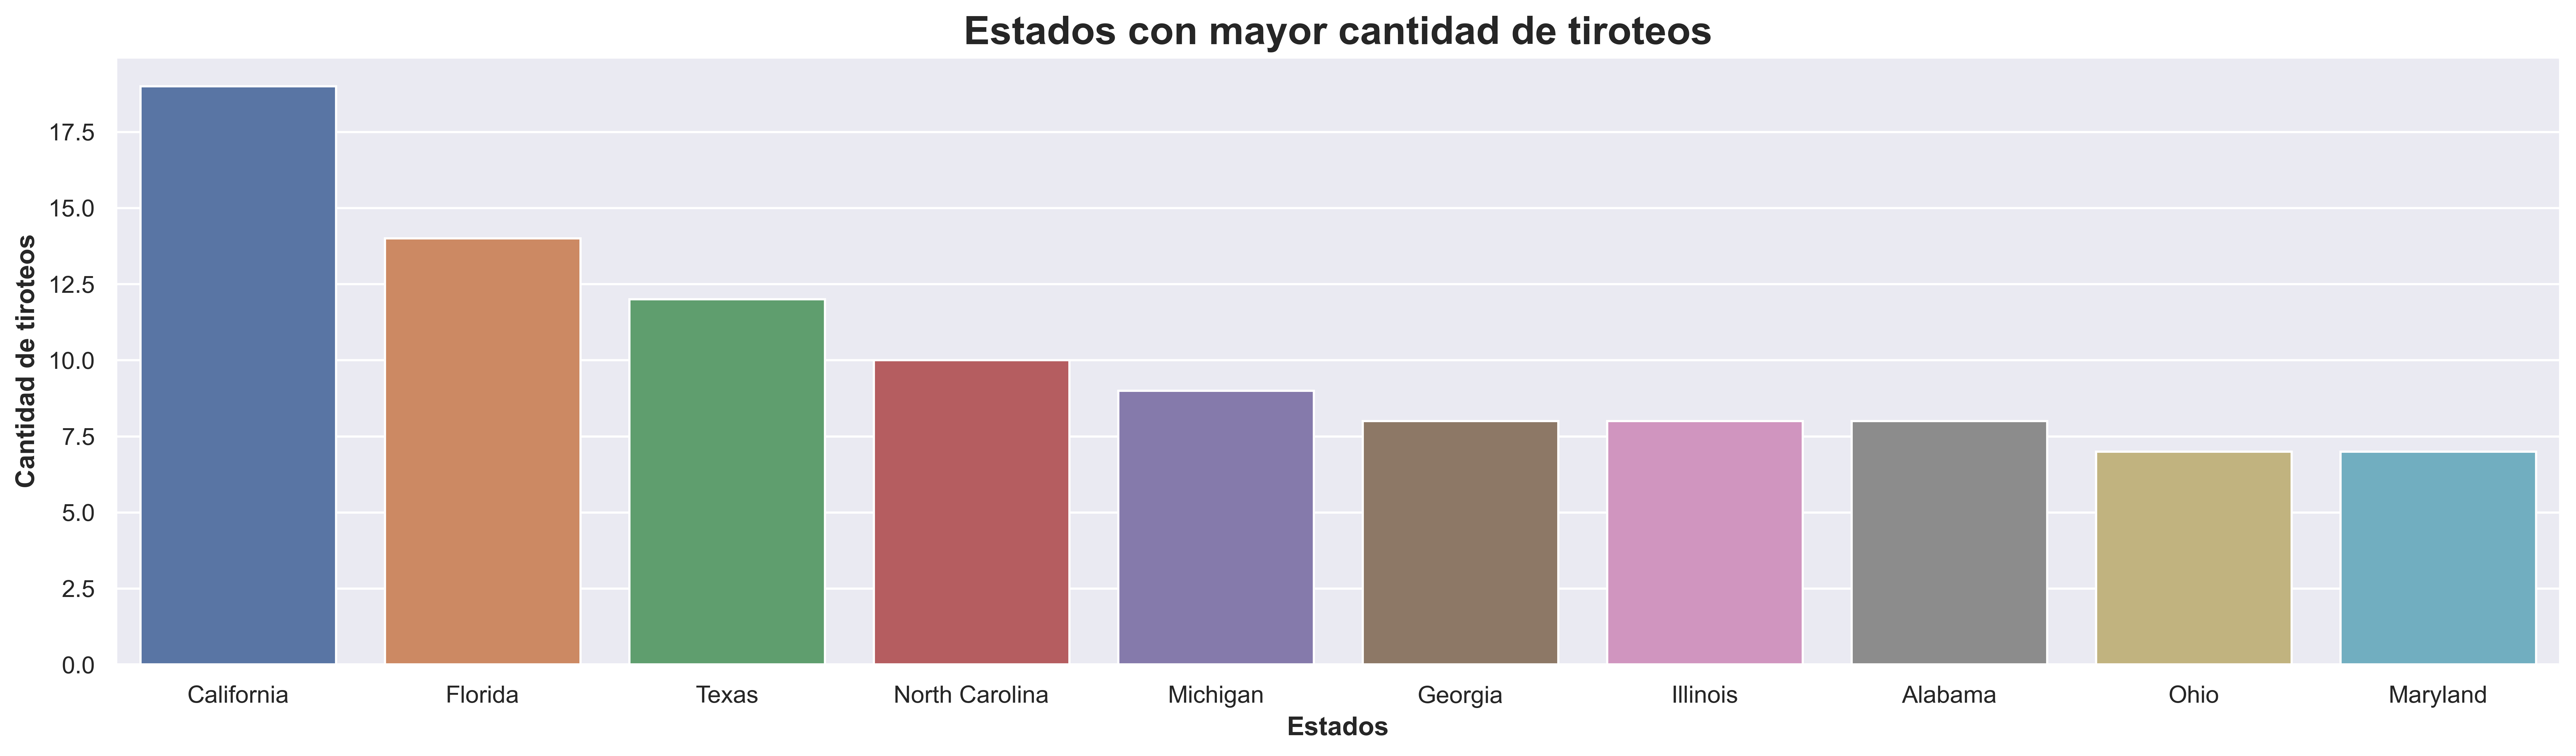

In [26]:
top_state = df['state'].value_counts().nlargest(10)
top_state = top_state.reset_index(name='count')

plt.figure(figsize=(20,5), dpi=500)
sns.barplot(data=top_state, x='index', y='count')
plt.title('Estados con mayor cantidad de tiroteos', weight='bold', fontsize=18)
plt.xlabel('Estados', weight='bold', fontsize=12)
plt.ylabel('Cantidad de tiroteos', weight='bold', fontsize=12);

El grupo de los 10 estados con mayor cantidad de incidentes reportados está conformado en su mayoría con por estados que se encuentran en el lado este de los Estados Unidos. Sin embargo, California(costa oeste) es el estado que tiene mayor incidencia.

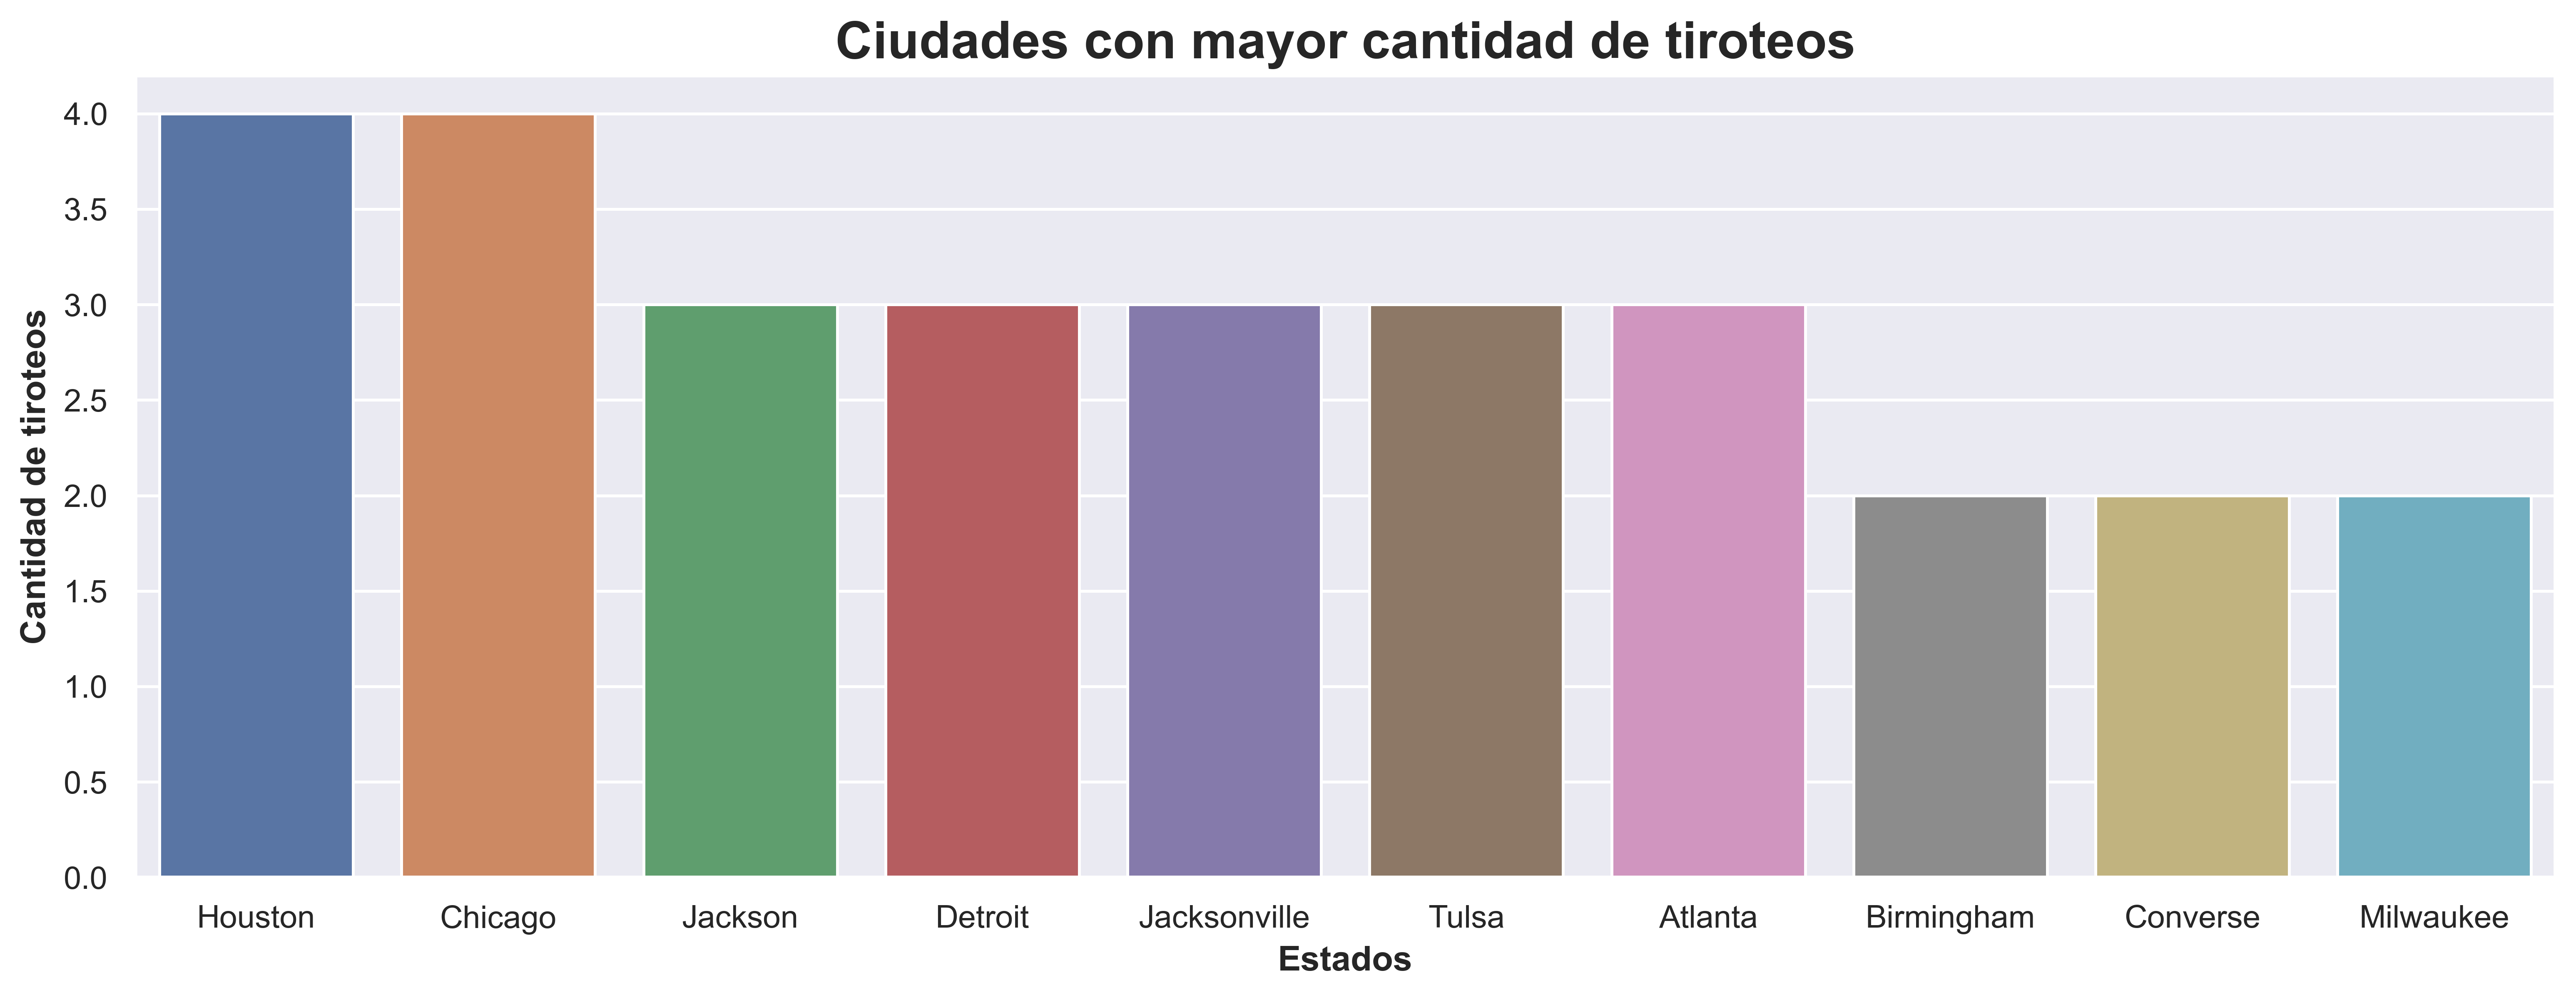

In [27]:
top_cities = df['city'].value_counts().nlargest(10)
top_cities = top_cities.reset_index(name='count')

plt.figure(figsize=(15,5), dpi=500)
sns.barplot(data=top_cities, x='index', y='count')
plt.title('Ciudades con mayor cantidad de tiroteos', weight='bold', fontsize=18)
plt.xlabel('Estados', weight='bold', fontsize=12)
plt.ylabel('Cantidad de tiroteos', weight='bold', fontsize=12);

Houston(Texas) y Chicago(Illinois) son las ciudad con mayor cantidad de reportes sobre tiroteos con 4 incidencias.

#### Etnicidad y tipo de zonas

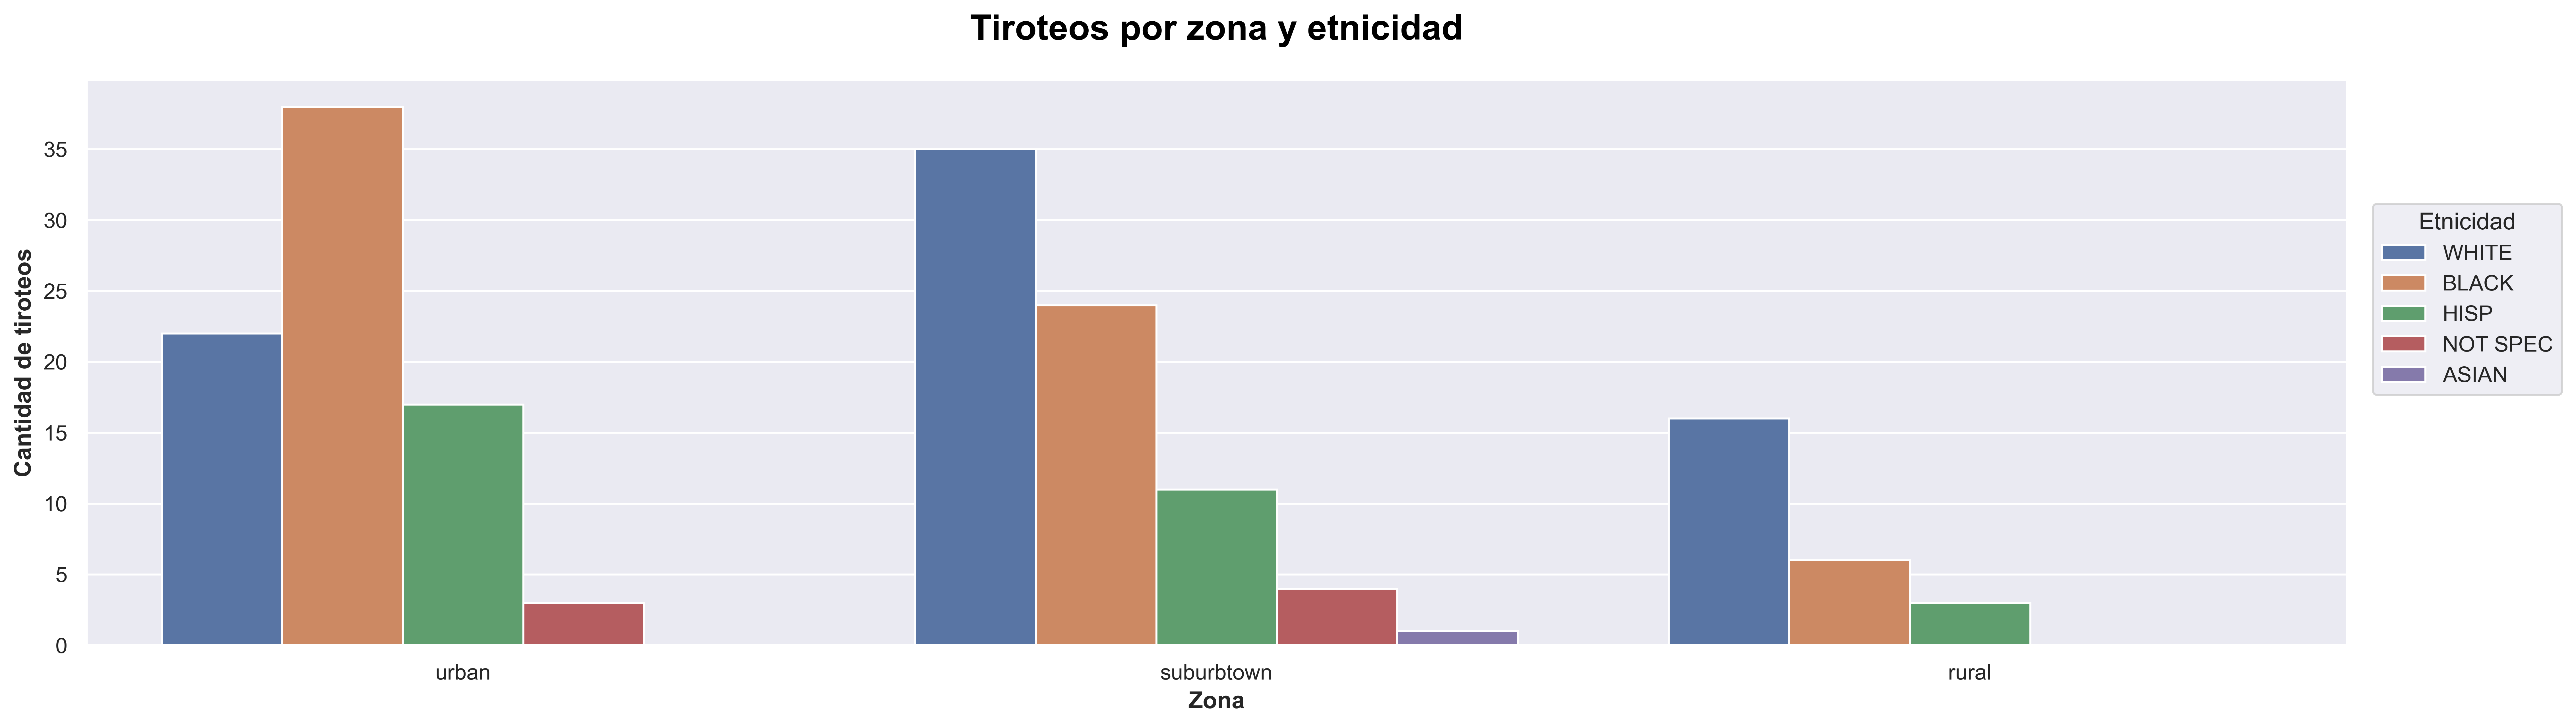

In [28]:
plt.figure(figsize=(18,5), dpi=500, layout='constrained')
sns.countplot(data=df, x='urbanrural', hue='race', hue_order=['WHITE','BLACK','HISP','NOT SPEC','ASIAN'],
              order=['urban','suburbtown','rural'])
plt.title('Tiroteos por zona y etnicidad', weight='bold', color='black', fontsize=18, y=1.05)
plt.xlabel('Zona', weight='bold',fontsize=12)
plt.ylabel('Cantidad de tiroteos', weight='bold', fontsize=12)
plt.legend(bbox_to_anchor=(1.1,0.8), title='Etnicidad');

Tanto zonas urbanas como suburbanas son las que tienen un mayor incidencia que las zonas rurales por una gran diferencia.

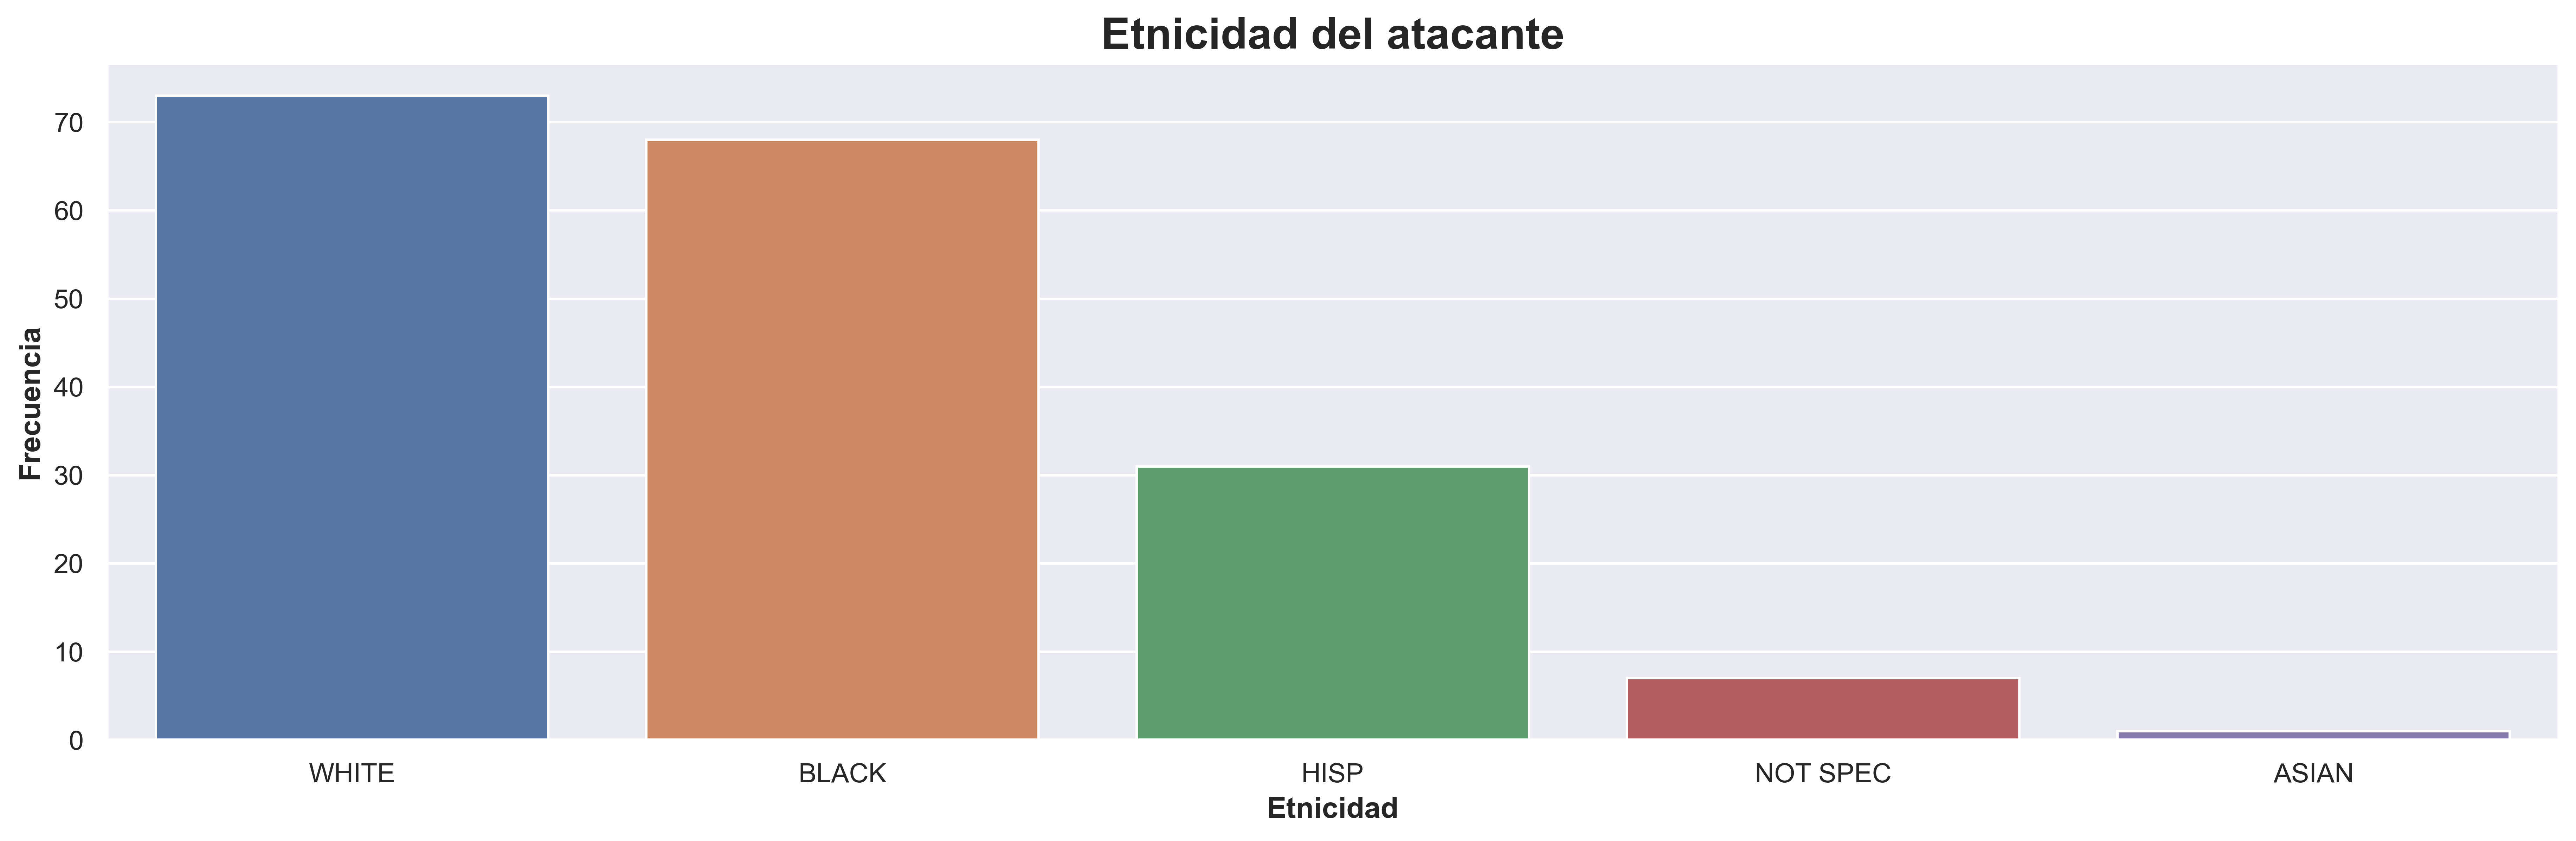

In [29]:
plt.figure(figsize=(18,5), dpi=500)
sns.countplot(data=df,x='race', order=['WHITE','BLACK','HISP','NOT SPEC','ASIAN'])
plt.title('Etnicidad del atacante', weight='bold', fontsize=18)
plt.xlabel('Etnicidad', weight='bold', fontsize=12)
plt.ylabel('Frecuencia', weight='bold', fontsize=12);

Más de la mitad de los ataques en escuela han sido realizados por gente blanca y negra, siendo los primero quienes tienen mayor cantidad de registros por poca cantidad de casos. Cabe mencionar que hay una categoría de no especificados ya que no se cuenta con dicha información. Solo se tiene registrado un ataque por una persona de origen asiático.

#### Tiroteos por nivel educativo

Primero agrupamos según el nivel educativo.

In [30]:
counts = df['type'].value_counts()
counts = counts.reset_index(name='counts')

In [31]:
total = counts['counts'].sum(numeric_only=True)
counts['percentage'] = counts['counts'] / total
counts['grouped_index'] = counts['index']
counts.loc[counts['percentage'] < 0.02, 'grouped_index'] = 'Other'
grouped_data = counts.groupby('grouped_index').sum()

C:\Users\Pc\AppData\Local\Temp\ipykernel_9372\1478729851.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = counts.groupby('grouped_index').sum()


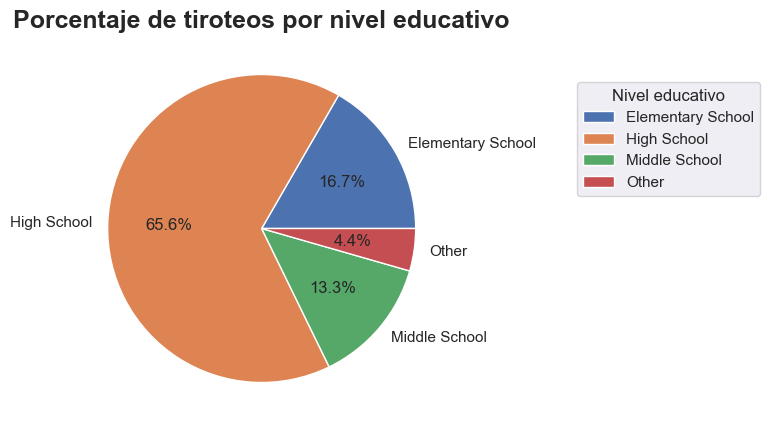

In [32]:
fig, ax = plt.subplots(figsize=(40,5))
ax.pie(grouped_data['counts'], labels=grouped_data.index, autopct='%1.1f%%')
ax.set_title('Porcentaje de tiroteos por nivel educativo', weight='bold', fontsize=18)
ax.legend(title='Nivel educativo', bbox_to_anchor=(1.3,0.9));

Más de la mitad de los ataques fueron realizados en el High School.

## Extra Map

Crearemos un mapa de los Estados Unidos con la cantidad de casos

In [33]:
import plotly.express as px

In [34]:
top_state = df['state'].value_counts()
top_state = top_state.reset_index(name='count')

In [35]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Pennsylvania': 'PA',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY'
}

In [36]:
top_state['index'] = top_state['index'].map(us_state_abbrev)

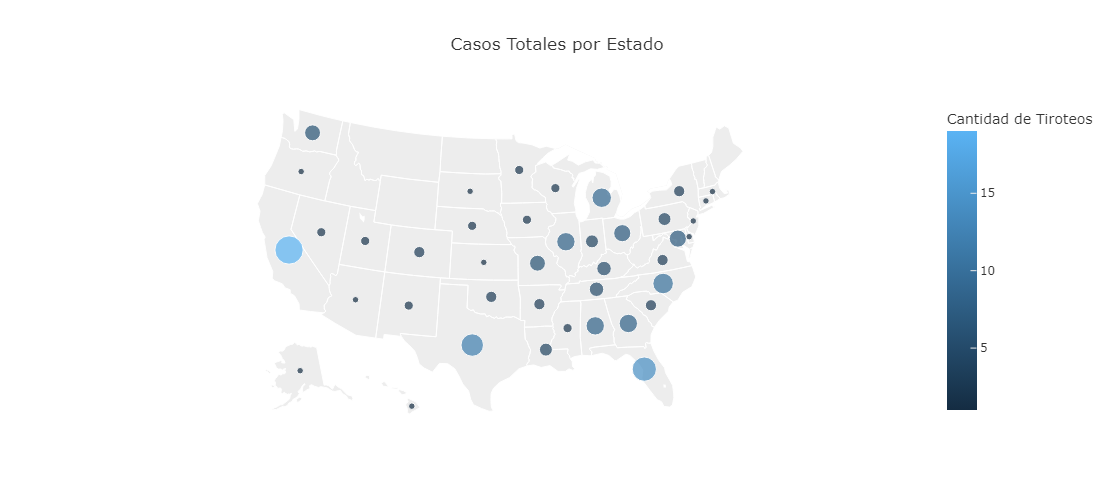

In [37]:
# Creamos el bubble map
fig = px.scatter_geo(top_state, locations='index', locationmode='USA-states', color='count', size='count',scope='usa',
                     title='Casos Totales por Estado', labels={'count':'Cantidad de Tiroteos', 'index':'Estado'}, template='ggplot2')
fig.update_layout(width=1100, height=500)
fig.show()